## EDA on QCOM Stock

In [1]:
!pip install pygwalker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 94.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading tha data

In [3]:
df=pd.read_csv("/content/QCOM_stock.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Close,High,Low,Open,Volume,Daily_Return,SMA_20,SMA_50
Date,,,,,,,,
2015-12-15,36.414829,37.013908,35.489670,36.179747,20086900,0.025411,37.411386,40.788302
2015-12-16,36.452755,36.854667,35.755096,36.589254,13308300,0.001041,37.244855,40.671528
2015-12-17,36.050838,37.612989,36.050838,37.400659,15328000,-0.011026,37.245205,40.542362
2015-12-18,35.967422,36.430002,35.656509,35.921922,46440200,-0.002314,37.226743,40.395757
2015-12-21,36.975990,37.104907,36.050834,36.103917,16779000,0.028041,37.212527,40.267522


In [4]:
df.shape

(2465, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2015-12-15 to 2025-10-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         2465 non-null   float64
 1   High          2465 non-null   float64
 2   Low           2465 non-null   float64
 3   Open          2465 non-null   float64
 4   Volume        2465 non-null   int64  
 5   Daily_Return  2465 non-null   float64
 6   SMA_20        2465 non-null   float64
 7   SMA_50        2465 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 173.3 KB


## Data description

In [6]:
df.describe()

,Close,High,Low,Open,Volume,Daily_Return,SMA_20,SMA_50
count,2465.000000,2465.000000,2465.000000,2465.000000,2.465000e+03,2465.000000,2465.000000,2465.000000
mean,97.400053,98.687339,96.078689,97.399959,1.021847e+07,0.000909,96.898274,96.175343
std,45.991980,46.685810,45.283182,46.025509,6.944566e+06,0.023552,45.727735,45.376300
min,32.577702,32.827948,32.031705,32.236451,2.120200e+06,-0.149452,34.398065,35.739317
25%,51.368263,51.925939,50.575363,51.341037,6.692000e+06,-0.009794,50.702521,50.198510
50%,103.638298,105.133540,102.227993,103.751225,8.513700e+06,0.000844,105.008590,106.180874
75%,134.037567,135.888633,132.070824,134.334803,1.170130e+07,0.012234,134.514559,131.288495
max,220.949265,224.393548,219.888743,220.686576,1.560193e+08,0.232074,205.336111,197.670691


In [7]:
df.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0
Daily_Return,0
SMA_20,0
SMA_50,0


In [8]:
df1=df[0:50]
df1['Close'].mean()

np.float64(35.97515579223633)

## Data Distribution

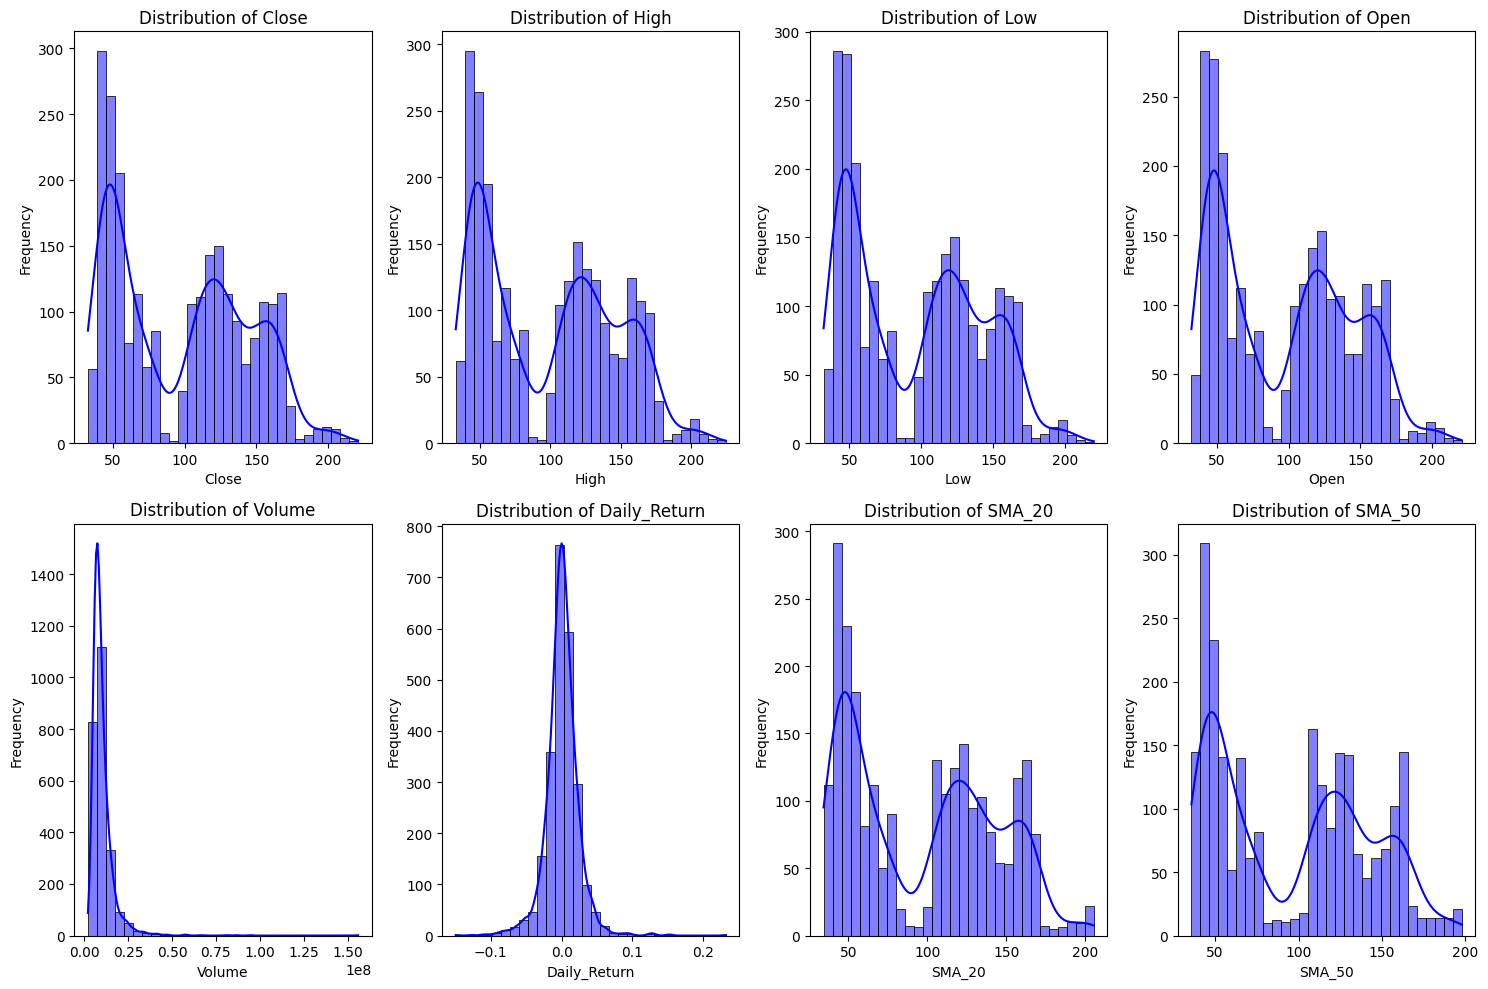

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i)
    sns.histplot(df[col], kde=True, color='blue', bins=30) #kde-kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### IQR

In [10]:
outliers={}
for col in df.columns:
  if df[col].dtype in ['int64','float64']:

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print(f"lower value of {col} :",lower)
    print(f"upper value of {col} :",upper)
    print('\n')
    outlier_values = df.loc[(df[col] < lower) | (df[col] > upper), col].values
    outliers[col] = outlier_values

print("Outliers in each column")
for col,value in outliers.items():
  print(col,value)
  print('\n')


lower value of Close : -72.63569259643555
upper value of Close : 258.0415229797363


lower value of High : -74.01810173780869
upper value of High : 261.83267448172614


lower value of Low : -71.66782880481921
upper value of Low : 254.3140160373772


lower value of Open : -73.14961316266667
upper value of Open : 258.82545334679185


lower value of Volume : -821950.0
upper value of Volume : 19215250.0


lower value of Daily_Return : -0.0428366491109381
upper value of Daily_Return : 0.0452764039905659


lower value of SMA_20 : -75.01553592681886
upper value of SMA_20 : 260.2326162338257


lower value of SMA_50 : -71.43646686553954
upper value of SMA_50 : 252.92347240447998


Outliers in each column
Close []


High []


Low []


Open []


Volume [ 20086900  46440200  20495600  21649400  27935200  24039200  21079700
  21052300  28991500  33912300  43098800  34879500  19676600  33941700
  22426300  20936900  94436000  41751800  27307900  37888200  23474400
  20057800  24822200  24664600  343

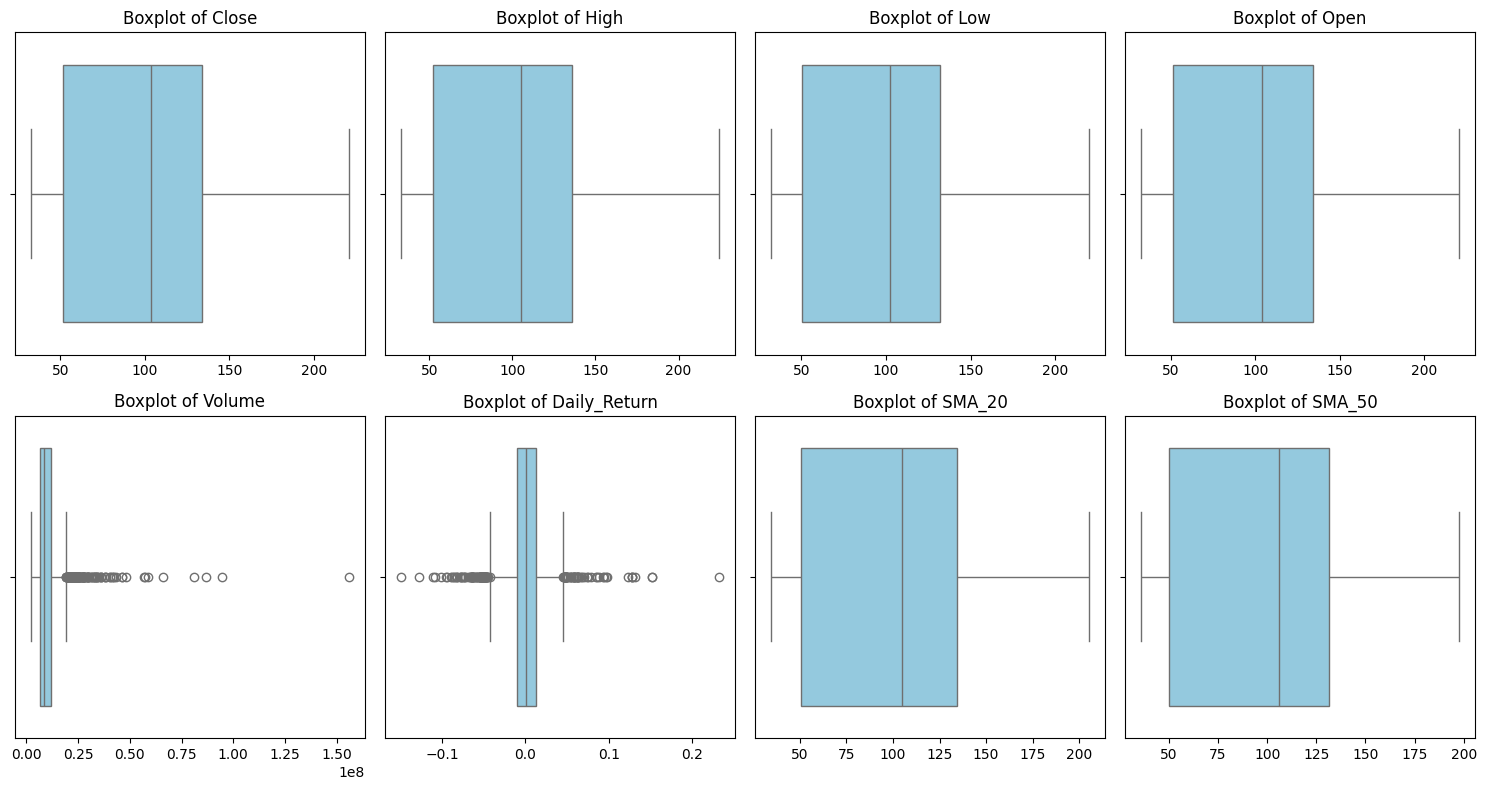

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


## Corellation of features

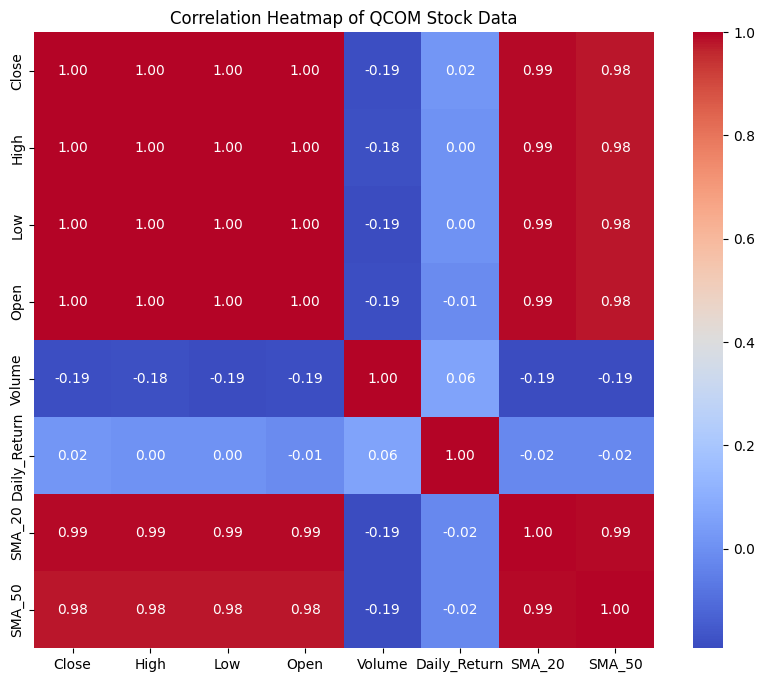

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of QCOM Stock Data')
plt.show()

BIVARIATE ANALYSIS

Close vs Volume

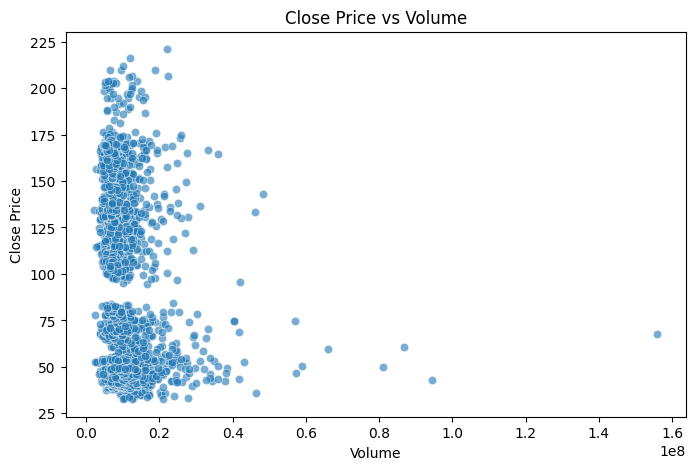

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.6)
plt.title('Close Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

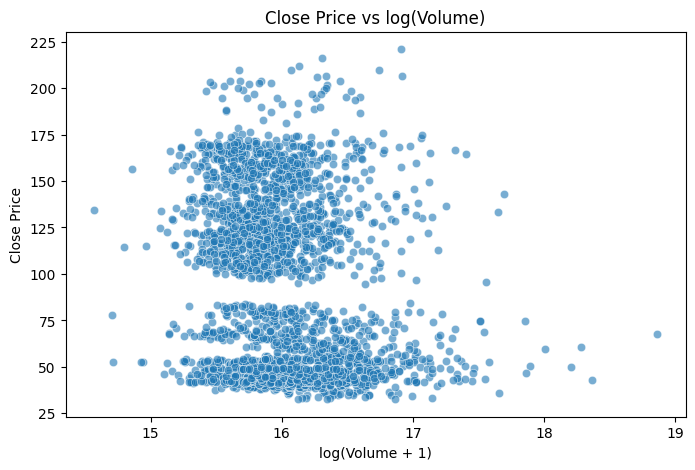

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log1p(df['Volume']), y=df['Close'], alpha=0.6)
plt.title('Close Price vs log(Volume)')
plt.xlabel('log(Volume + 1)')
plt.ylabel('Close Price')
plt.show()

In [15]:
corr_raw = df['Close'].corr(df['Volume'])
corr_log = df['Close'].corr(np.log1p(df['Volume']))
print(f"Correlation (Close vs Volume) = {corr_raw:.3f}")
print(f"Correlation (Close vs log(Volume)) = {corr_log:.3f}")

Correlation (Close vs Volume) = -0.186
Correlation (Close vs log(Volume)) = -0.228


Close vs Open

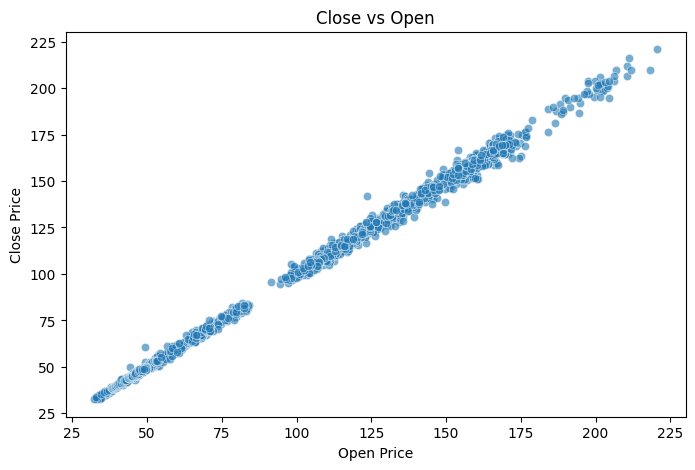

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Open', y='Close', data=df, alpha=0.6)
plt.title('Close vs Open')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

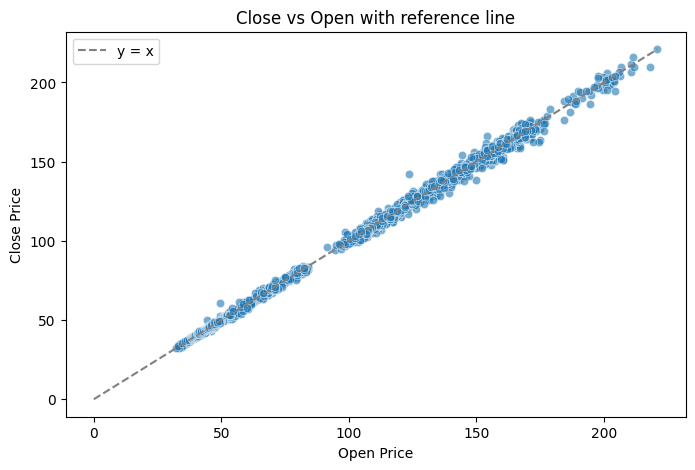

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Open', y='Close', data=df, alpha=0.6)
mx = max(df['Open'].max(), df['Close'].max())
plt.plot([0, mx], [0, mx], color='gray', linestyle='--', label='y = x')
plt.legend()
plt.title('Close vs Open with reference line')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

In [18]:
corr_open_close = df['Open'].corr(df['Close'])
print(f"Correlation (Open vs Close) = {corr_open_close:.3f}")

Correlation (Open vs Close) = 0.999


SMA_20 vs Close

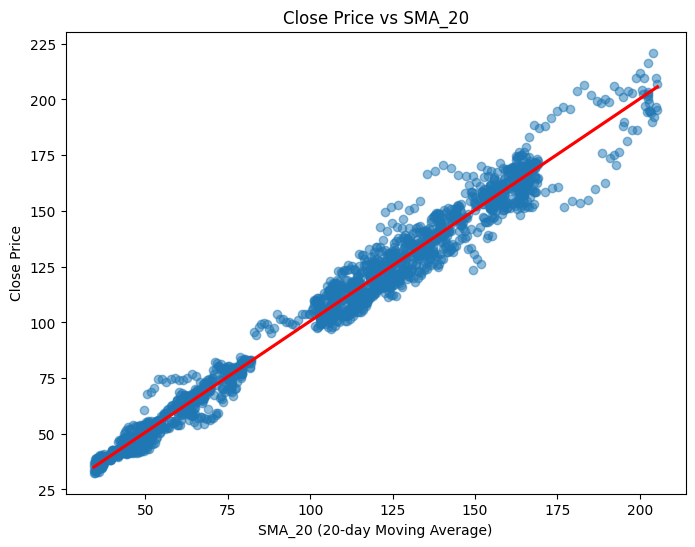

In [19]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='SMA_20', y='Close', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Close Price vs SMA_20')
plt.xlabel('SMA_20 (20-day Moving Average)')
plt.ylabel('Close Price')
plt.show()

In [20]:
corr_close_sma20 = df['Close'].corr(df['SMA_20'])
print("Correlation (Close vs SMA_20) =", round(corr_close_sma20, 3))

Correlation (Close vs SMA_20) = 0.992


Close vs SMA_50

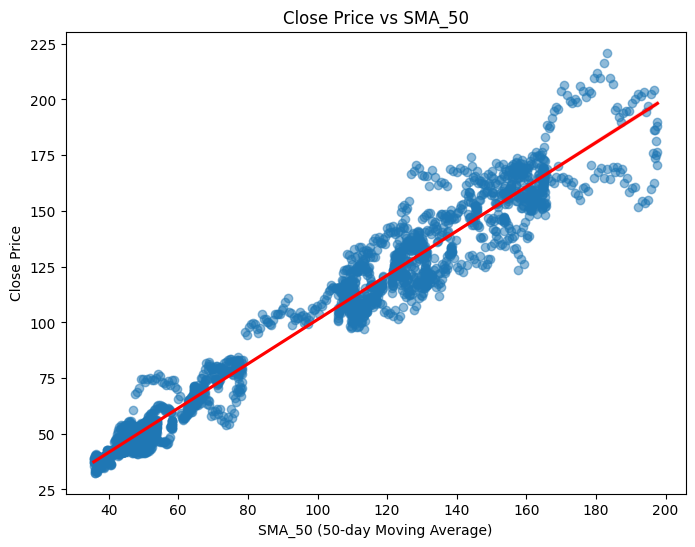

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='SMA_50', y='Close', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Close Price vs SMA_50')
plt.xlabel('SMA_50 (50-day Moving Average)')
plt.ylabel('Close Price')
plt.show()

In [22]:
corr_close_sma50 = df['Close'].corr(df['SMA_50'])
print("Correlation (Close vs SMA_50) =", round(corr_close_sma50, 3))

Correlation (Close vs SMA_50) = 0.979


Close vs Daily_Return

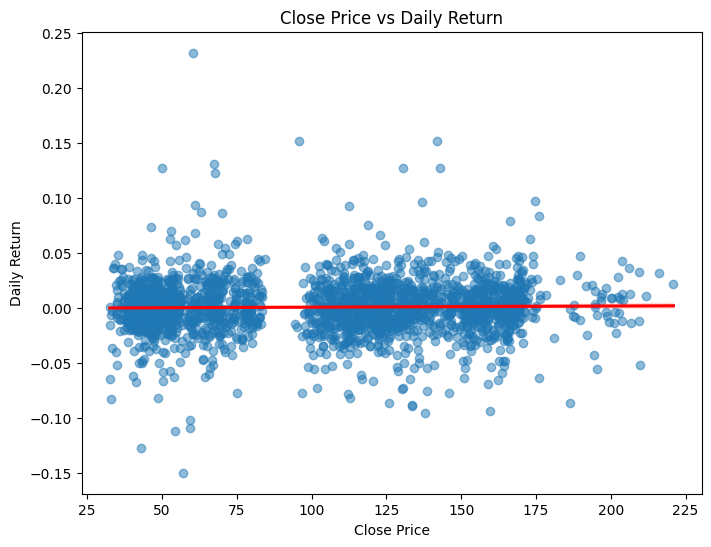

In [23]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Close', y='Daily_Return', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Close Price vs Daily Return')
plt.xlabel('Close Price')
plt.ylabel('Daily Return')
plt.show()

In [24]:
corr_close_return = df['Close'].corr(df['Daily_Return'])
print("Correlation (Close vs Daily_Return) =", round(corr_close_return, 3))

Correlation (Close vs Daily_Return) = 0.02


Volume vs Daily_Return

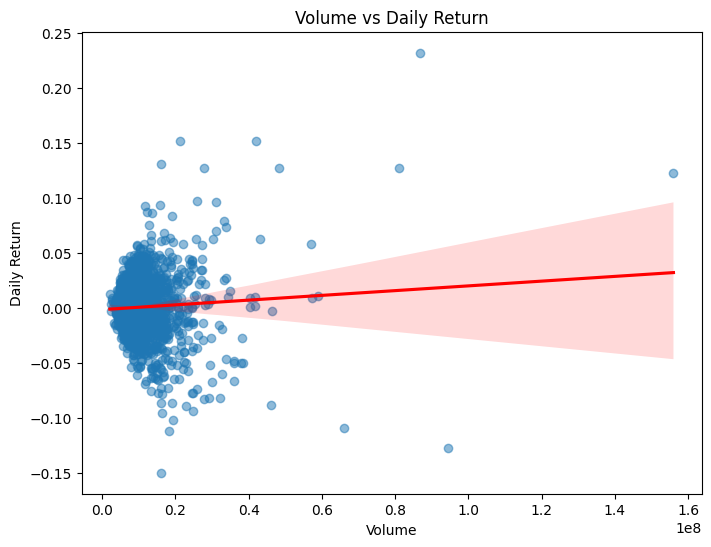

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Volume', y='Daily_Return', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Volume vs Daily Return')
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.show()

In [26]:
corr_vol_return = df['Volume'].corr(df['Daily_Return'])
print("Correlation (Volume vs Daily_Return) =", round(corr_vol_return, 3))

Correlation (Volume vs Daily_Return) = 0.064


MULTIVARIATE ANALYSIS

Returns with Moving Averages

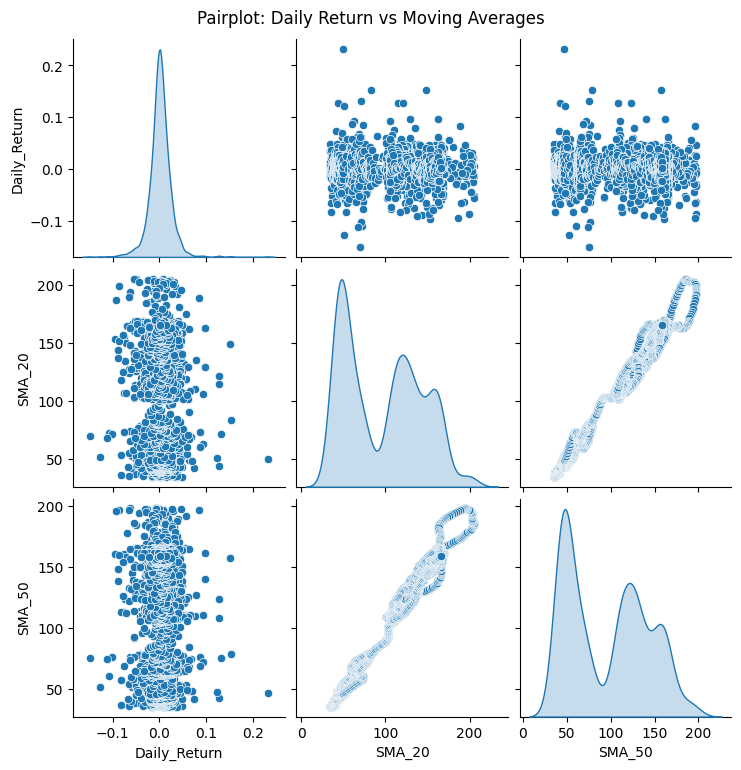

In [27]:
columns = ['Daily_Return', 'SMA_20', 'SMA_50']
sns.pairplot(df[columns], kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot: Daily Return vs Moving Averages", y=1.02)
plt.show()

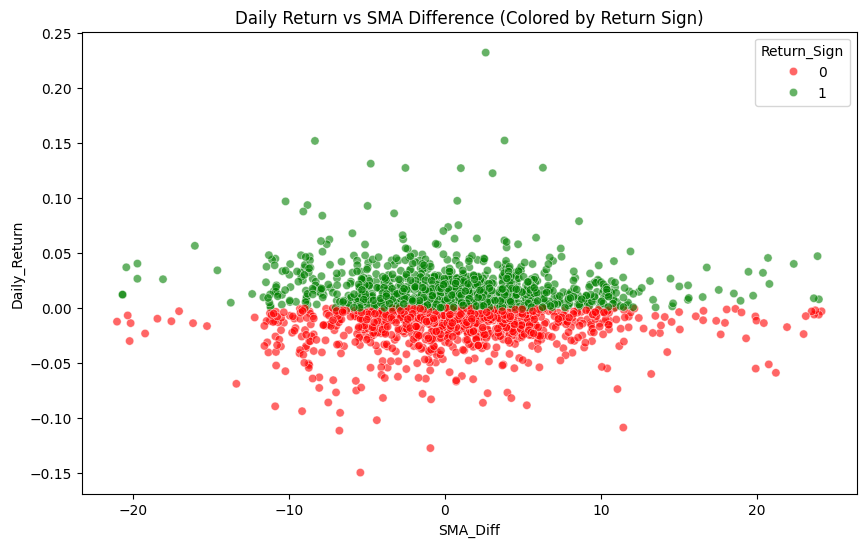

In [28]:
import statsmodels.api as sm

# Make a copy to avoid SettingWithCopyWarning
df_copy = df.copy()

df_copy['SMA_Crossover'] = (df_copy['SMA_20'] > df_copy['SMA_50']).astype(int)
df_copy['SMA_Diff'] = df_copy['SMA_20'] - df_copy['SMA_50']

df_copy['Volume_Rolling_Avg'] = df_copy['Volume'].rolling(window=20).mean()
df_copy['Volume_Ratio'] = df_copy['Volume'] / df_copy['Volume_Rolling_Avg']

df_copy['Return_Sign'] = df_copy['Daily_Return'].apply(lambda x: 1 if x > 0 else 0)
df_copy['Volume_SMA_Crossover'] = df_copy['Volume_Ratio'] * df_copy['SMA_Crossover']

df_copy = df_copy.dropna()

# Scatterplot: Daily_Return vs SMA_Diff colored by Return_Sign
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_copy, x='SMA_Diff', y='Daily_Return', hue='Return_Sign', palette=['red','green'], alpha=0.6)
plt.title('Daily Return vs SMA Difference (Colored by Return Sign)')
plt.show()

## Time Series Analysis

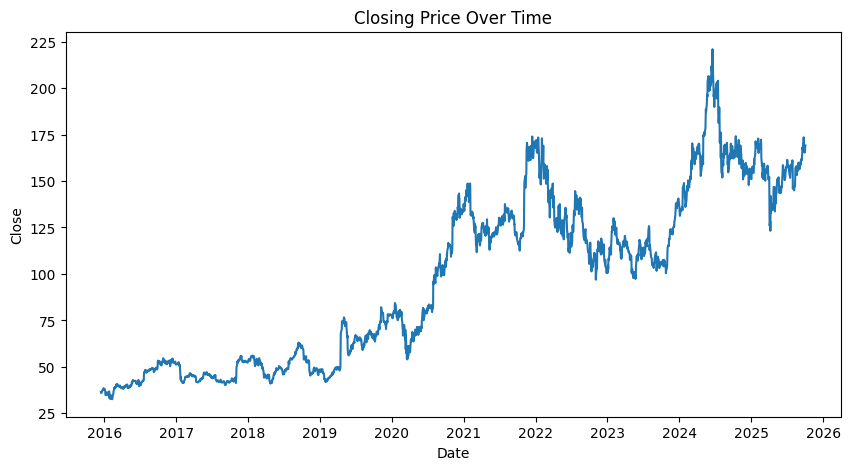

In [29]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)

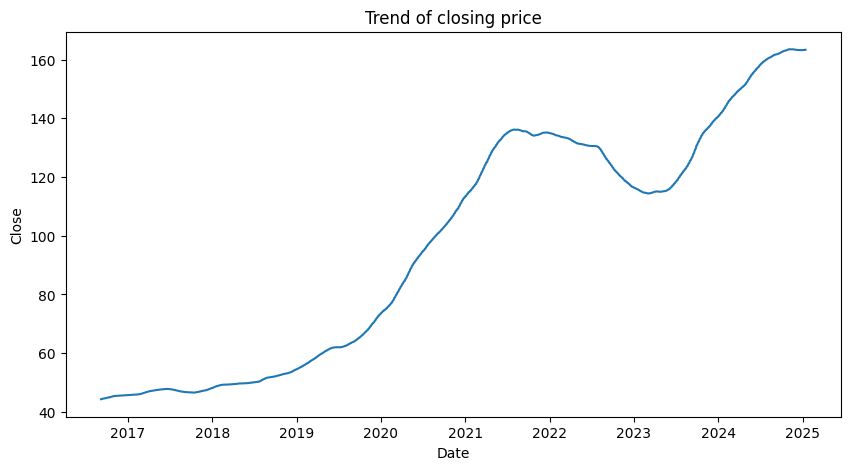

In [31]:
# Plot the Trend component
plt.figure(figsize=(10, 5))
plt.plot(decomposition.trend)
plt.title('Trend of closing price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

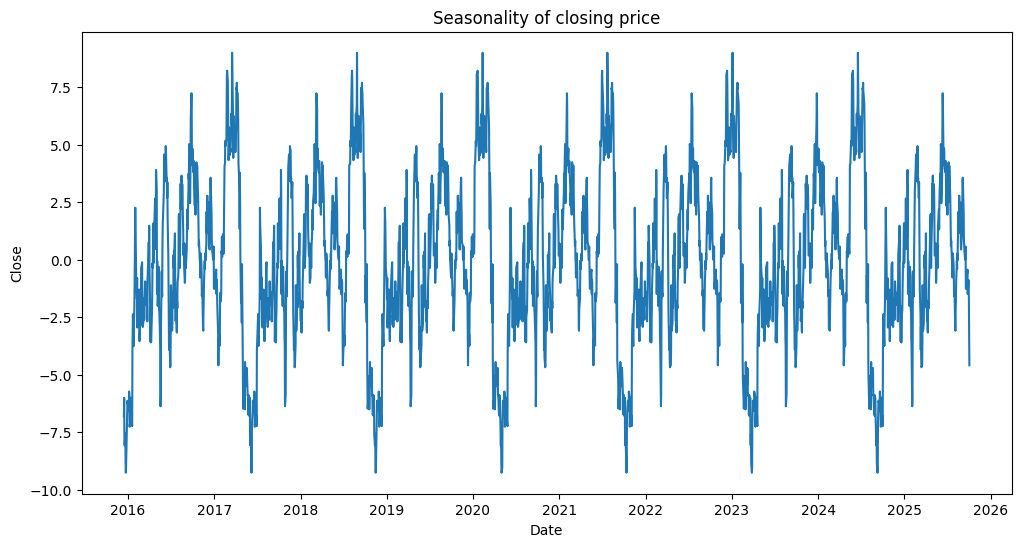

In [32]:
# Plot the Seasonal component
plt.figure(figsize=(12, 6))
plt.plot(decomposition.seasonal)
plt.title('Seasonality of closing price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

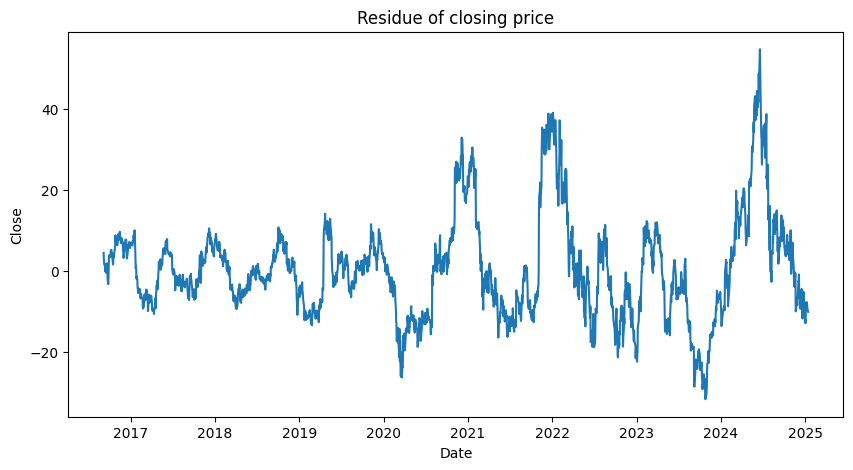

In [33]:
# Plot the Residual component
plt.figure(figsize=(10, 5))
plt.plot(decomposition.resid)
plt.title('Residue of closing price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

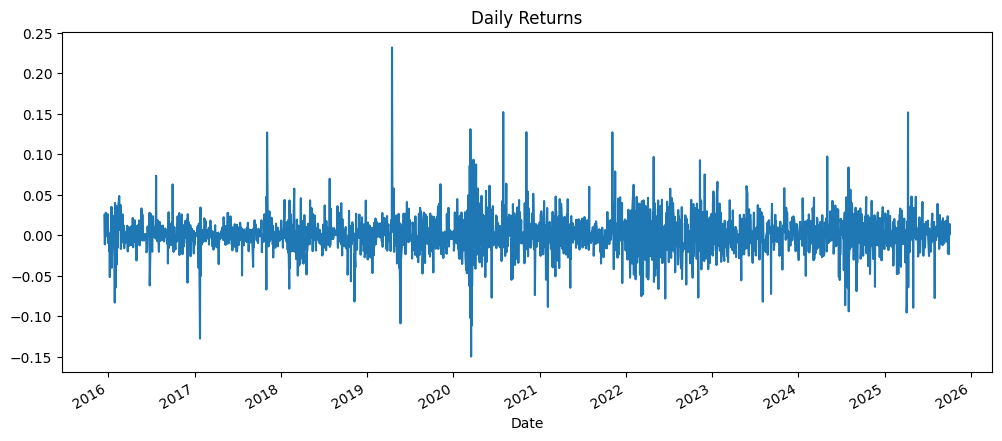

In [34]:
df['Daily_Return'].plot(figsize=(12,5), title='Daily Returns')

<Axes: title={'center': 'Daily Returns - 2025'}, xlabel='Date'>

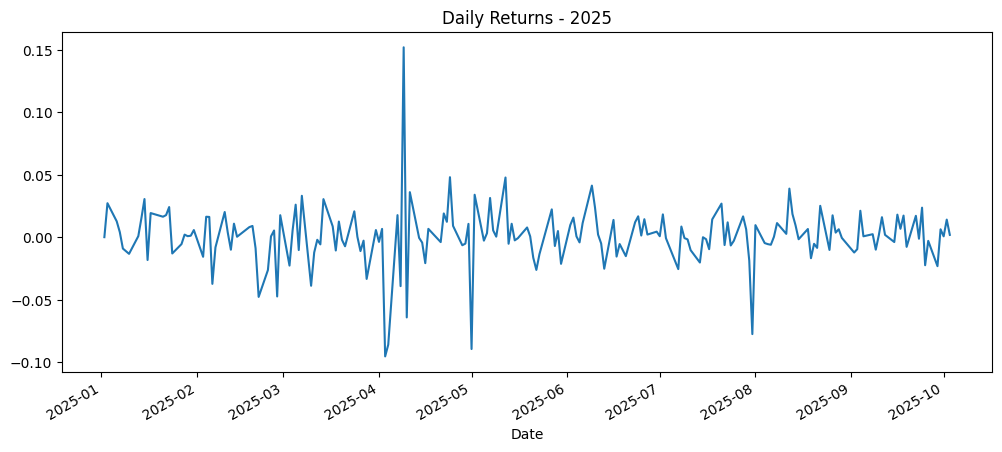

In [35]:
import datetime

current_year = datetime.datetime.now().year
df_current_year = df.loc[df.index.year == current_year].copy()

df_current_year['Daily_Return'].plot(figsize=(12,5), title=f'Daily Returns - {current_year}')

In [ ]:
annual_volatility = df_current_year['Daily_Return'].std() * (252**0.5)
print(annual_volatility)

0.37912984686651335


In [36]:
df_current_year['LogReturn'] = np.log(df_current_year['Close'] / df_current_year['Close'].shift(1))
df_current_year['RollingVol20'] = df_current_year['LogReturn'].rolling(20).std() * np.sqrt(252)
df_current_year['RollingVol60'] = df_current_year['LogReturn'].rolling(60).std() * np.sqrt(252)

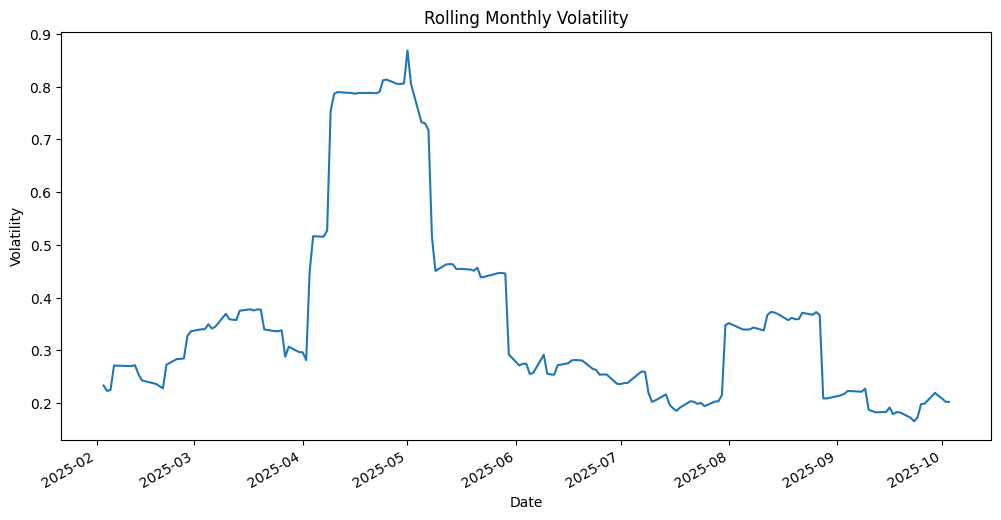

In [37]:
plt.figure(figsize=(12,6))
df_current_year['RollingVol20'].plot(title='Rolling Monthly Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

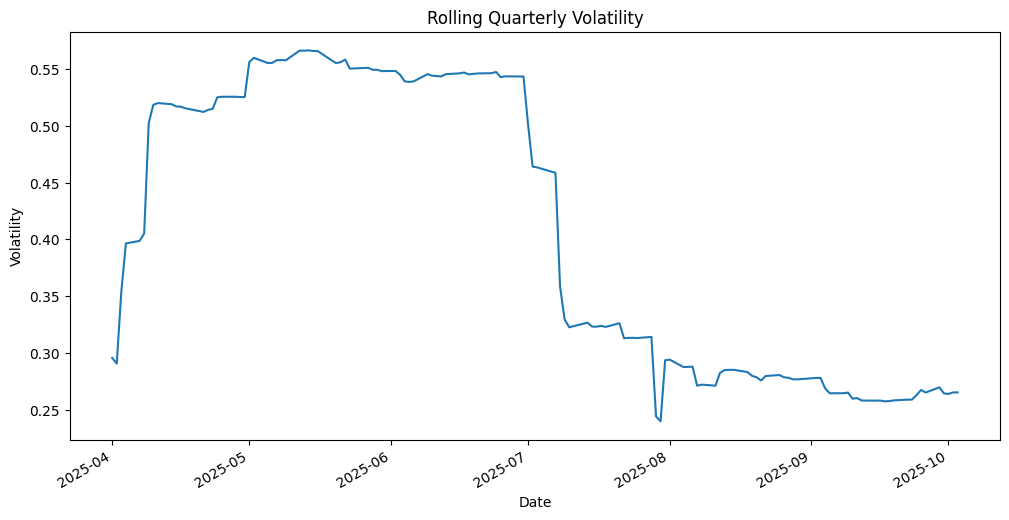

In [38]:
plt.figure(figsize=(12,6))
df_current_year['RollingVol60'].plot(title='Rolling Quarterly Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

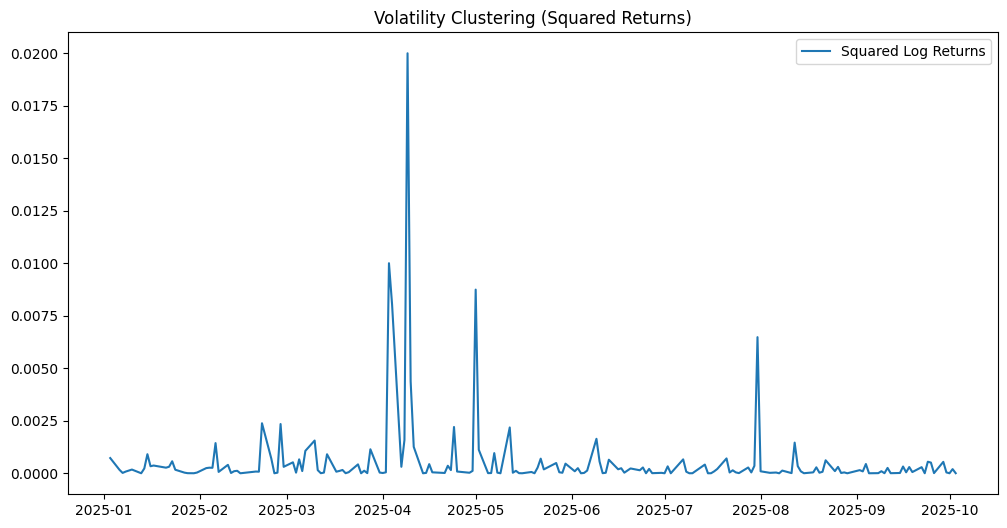

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df_current_year['LogReturn']**2, label='Squared Log Returns')
plt.title('Volatility Clustering (Squared Returns)')
plt.legend()
plt.show()

In [40]:
print(df_current_year['LogReturn'].skew(), df_current_year['LogReturn'].kurt())

-0.2155415781778229 9.595666020696674


Max Drawdown: -30.03%


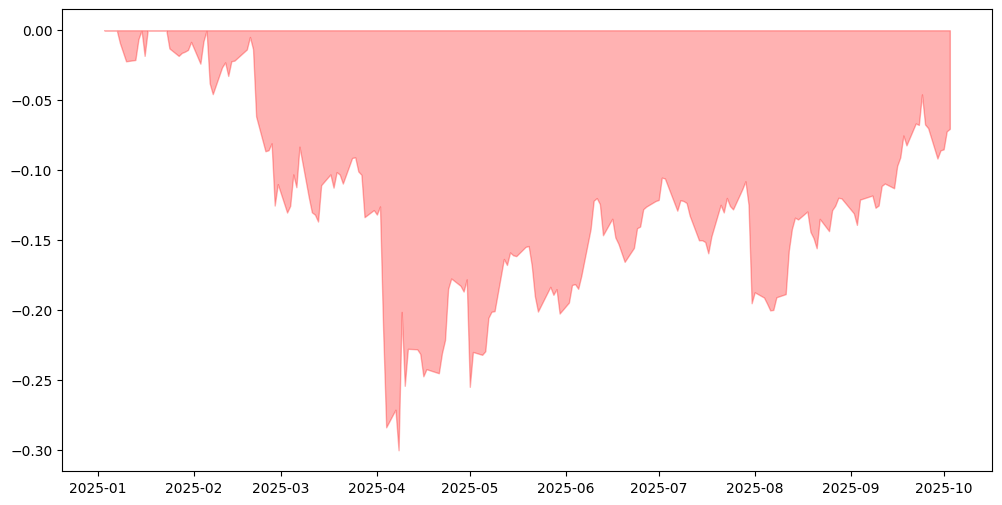

In [41]:
df_current_year['Cumulative'] = (1 + df_current_year['LogReturn']).cumprod()
df_current_year['Peak'] = df_current_year['Cumulative'].cummax()
df_current_year['Drawdown'] = df_current_year['Cumulative'] / df_current_year['Peak'] - 1
plt.figure(figsize=(12,6))
plt.fill_between(df_current_year.index, df_current_year['Drawdown'], color='red', alpha=0.3)
max_drawdown = df_current_year['Drawdown'].min()
print(f"Max Drawdown: {max_drawdown:.2%}")

Text(0.5, 1.0, 'Volatility Regimes (High=Red, Low=Blue)')

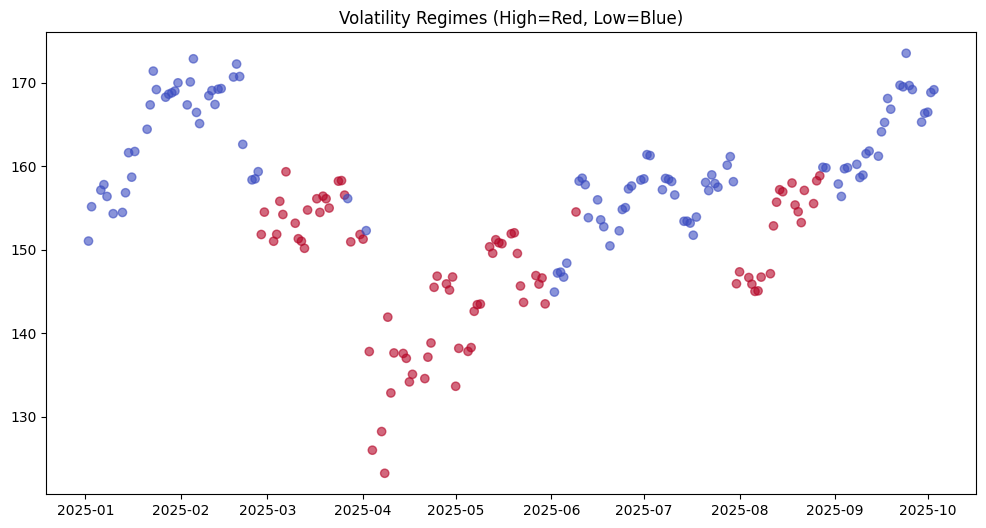

In [42]:
high_vol = df_current_year['RollingVol20'] > df_current_year['RollingVol20'].median()
plt.figure(figsize=(12,6))
plt.scatter(df_current_year.index, df_current_year['Close'], c=high_vol, cmap='coolwarm', alpha=0.6)
plt.title("Volatility Regimes (High=Red, Low=Blue)")

In [43]:
up_vol = df_current_year.loc[df_current_year['LogReturn'] > 0, 'LogReturn'].std()
down_vol = df_current_year.loc[df_current_year['LogReturn'] < 0, 'LogReturn'].std()
print(f"Up-day Volatility: {up_vol:.4f}, Down-day Volatility: {down_vol:.4f}")

Up-day Volatility: 0.0165, Down-day Volatility: 0.0210


<Axes: xlabel='Year', ylabel='LogReturn'>

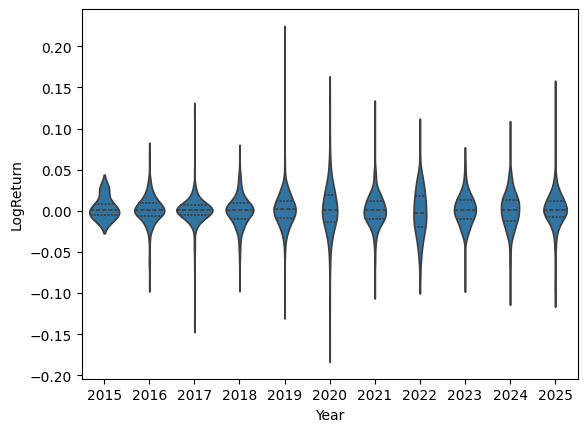

In [44]:
df['Year'] = df.index.year
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
sns.violinplot(x='Year', y='LogReturn', data=df, inner='quartile')

Text(0.5, 1.0, 'Risk-Return Scatter')

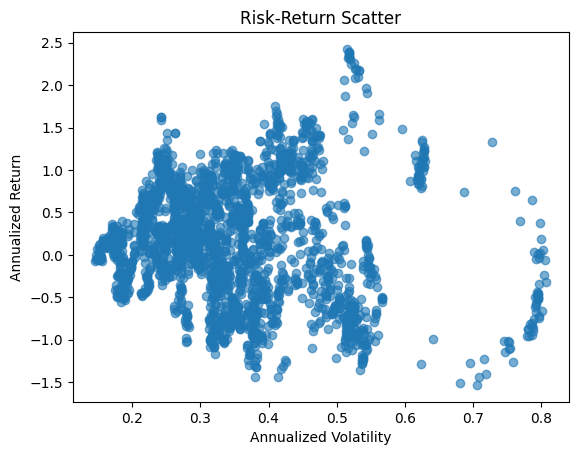

In [45]:
window = 60
rolling_ret = df['LogReturn'].rolling(window).mean() * 252
rolling_vol = df['LogReturn'].rolling(window).std() * np.sqrt(252)

plt.scatter(rolling_vol, rolling_ret, alpha=0.6)
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Risk-Return Scatter')


Text(0.5, 1.0, 'Q-Q Plot of Returns')

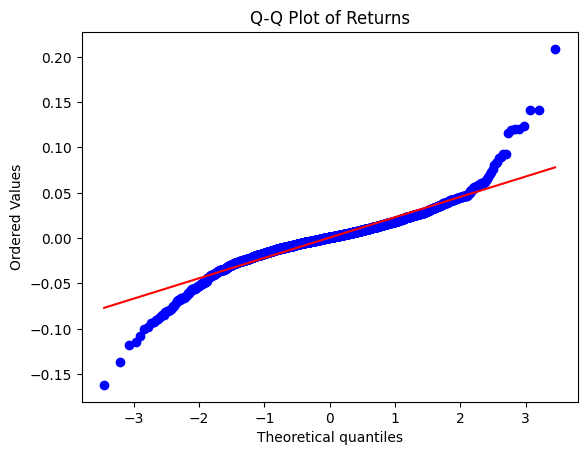

In [46]:
import scipy.stats as stats
stats.probplot(df['LogReturn'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot of Returns")

Text(0.5, 1.0, 'Autocorrelation of Returns')

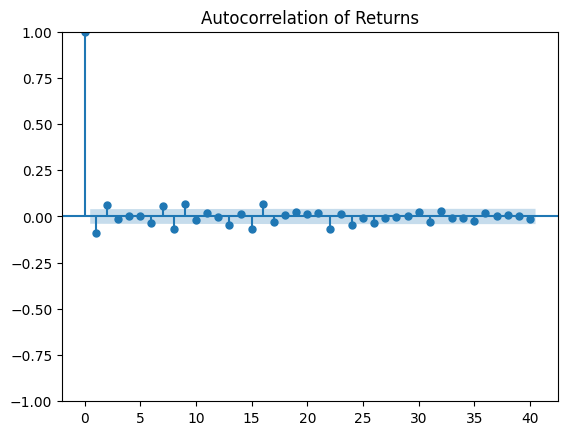

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['LogReturn'].dropna(), lags=40)
plt.title('Autocorrelation of Returns')